New Project File:

Defines a non-sequential neural net for the McDigit project

In [11]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import math
import random
from PIL import Image

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

numimages = 10000

new_train_images = np.zeros((numimages,280,280))
new_train_labels_space = np.zeros((numimages,4))
new_train_labels_class = np.zeros((numimages,10))

for i in range(numimages):

    randx = random.randrange(0,280-28,1)
    randy = random.randrange(0,280-28,1)

    new_train_images[i,randx:randx+28,randy:randy+28] = train_images[i]
    new_train_labels_space[i,0] = randx
    new_train_labels_space[i,1] = randy 
    new_train_labels_space[i,2] = randx + 28
    new_train_labels_space[i,3] = randy + 28
    new_train_labels_class[i,train_labels[i]] = 1 

#new_train_labels = (new_train_labels_space, new_train_labels_class)

#trainimagestensor = tf.convert_to_tensor(new_train_images, dtype=tf.float16)
#trainlabelstensor = tf.convert_to_tensor(new_train_labels, dtype=tf.float16)

#print(trainimagestensor[0])



Define the model.  

Input layer: 280x280 pixel images
Convolutional layers: 4x4 kernel, 8 filters
Dense network 1: 4 outputs (spatial)
Dense network 2: 10 outputs (classification)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 280, 280, 1)]        0         []                            
                                                                                                  
 Convolution (Conv2D)        (None, 280, 280, 4)          68        ['Input[0][0]']               
                                                                                                  
 Flatten (Flatten)           (None, 313600)               0         ['Convolution[0][0]']         
                                                                                                  
 Spatial (Dense)             (None, 4)                    1254404   ['Flatten[0][0]']             
                                                                                              

2023-11-08 14:42:08.982674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 14:42:09.011449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 14:42:09.011664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

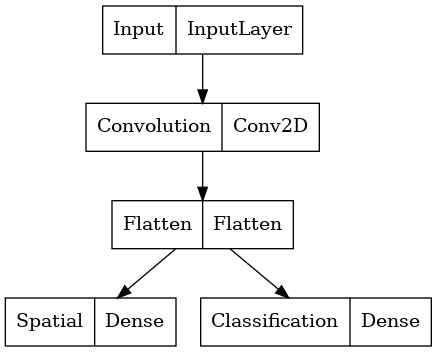

In [2]:


inputlayer = tf.keras.Input(shape=(280, 280,1), name="Input")
convlayer = tf.keras.layers.Conv2D(filters=4, kernel_size=(4,4),padding='same', name="Convolution")(inputlayer)


flatlayer = tf.keras.layers.Flatten(name="Flatten")(convlayer)

spacelayer = tf.keras.layers.Dense(4, activation='relu', name='Spatial')(flatlayer)
classlayer = tf.keras.layers.Dense(10, activation='softmax', name='Classification')(flatlayer)

model = tf.keras.Model(inputs=inputlayer, outputs=[spacelayer, classlayer])


model.summary()

model.compile(
  optimizer=tf.keras.optimizers.Adam(0.001),
  loss={"Spatial": tf.keras.losses.MeanSquaredError(), "Classification": tf.keras.losses.CategoricalCrossentropy()},
  metrics=['accuracy']
  )

tf.keras.utils.plot_model(model, "model.png")

In [3]:
model.fit(new_train_images, [new_train_labels_space, new_train_labels_class], epochs=10)

Epoch 1/10


2023-11-08 14:42:17.576332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-11-08 14:42:17.921957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-08 14:42:17.963468: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55fc4593a240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 14:42:17.963497: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2023-11-08 14:42:17.967607: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-08 14:42:18.054661: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

313/313 [==============================] - 4s 9ms/step - loss: 4053.5896 - Spatial_loss: 4047.8420 - Classification_loss: 5.7471 - Spatial_accuracy: 0.7850 - Classification_accuracy: 0.1130
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 603.7947 - Spatial_loss: 596.9031 - Classification_loss: 6.8918 - Spatial_accuracy: 0.9891 - Classification_accuracy: 0.2652
Epoch 3/10
313/313 [==============================] - 3s 8ms/step - loss: 488.7910 - Spatial_loss: 483.8456 - Classification_loss: 4.9453 - Spatial_accuracy: 0.9871 - Classification_accuracy: 0.3926
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 428.8798 - Spatial_loss: 424.8136 - Classification_loss: 4.0660 - Spatial_accuracy: 0.9852 - Classification_accuracy: 0.4767
Epoch 5/10
313/313 [==============================] - 3s 8ms/step - loss: 393.7275 - Spatial_loss: 390.5027 - Classification_loss: 3.2248 - Spatial_accuracy: 0.9806 - Classification_accuracy: 0.5618
Epoch 6/10
313

In [4]:
#model.save_weights('myweights1')

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[212.  54. 240.  82.]


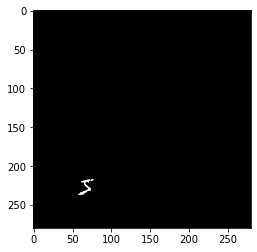

1/1 [==============================] - 0s 13ms/step


array([[193.71126,  77.09296, 221.3439 , 103.10795]], dtype=float32)

In [17]:



print(new_train_labels_class[0])
print(new_train_labels_space[0])



plt.imshow(new_train_images[0], interpolation="nearest",cmap="gray")

plt.show()





test1 = np.expand_dims(new_train_images[0],0)
outtest1 = model.predict(test1)

outtest1[0]